In [20]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

## Applications of Linear Transformations

### Computer graphics

Computer graphics essentially consist of a large number of basic geometric shapes such as triangles or quadrilaterals, defined by their vertexes (corners).  The ability to manipulate these shapes efficiently is a fundamental necessity in the field of computer graphics.  Linear transformations can be used to generate complex shapes from basic shapes through effects such as shearing and reflection, and can also be used to rotate and translate shapes in order to create a sequence of images needed for an animated scene.

The software responsible for rendering three-dimensional scenes in modern video games must process the coordinates of millions of vertexes in each frame of animation.  Typical hardware used for running the software will be able to generate around 60 frames per second.  In addition to the placement of vertexes in a scene, there are other computations required, such as those to provide color and shading, and then to project the three-dimensional scene onto the two-dimensional screen.  In this context, the efficiency of the algorithms, software, and hardware all play a major role in the quality of the end result.  

The use of matrix multiplication to manipulate coordinates for computer graphics has two primary advantages.  Matrix representations can be used to merge multiple transformations together into a single transformation.  For example, instead of applying a rotation followed by a scaling transformation, the two operations can easily be merged into a single operation by multiplying the associated matrices.  The other advantage to organizing the calculations into matrix multiplications is that dedicated hardware (graphics processing units) is designed specifically to handle these calculations in large numbers.

A linear transformations is scaling followed by a rotation followed by another scaling. 

Here we show how to use matrix multiplication to carry out a translation, which is not a linear transformation.  For instance - moving a picture in the plane horizontally to the right.

#### Translation

A **translation** is a transformation that moves all points an equal amount in the same direction.  Shown below is an example where all points are shifted (translated) three units to the right, and one unit up by a transformation $T:\mathbb{R}^2 \to \mathbb{R}^2$.  In the plot, we show several points which define a shape, and their corresponding images under the translation.  

In [59]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np

coords = np.array([[0,0],[0,3],[1,3],[1,1],[2,1],[2,0],[0,0]])
coords = coords.transpose()

x = coords[0,:]
y = coords[1,:]

## Compute translation by adding 3 to x coordinates and 1 to y coordinates
x_translated =  np.copy(x)
y_translated =  np.copy(y)

for i in range(x.shape[0]):
    x_translated[i] += 3
    y_translated[i] += 1

In [60]:
y_translated

array([1, 4, 4, 2, 2, 1, 1])

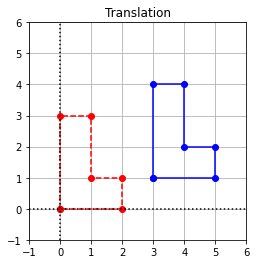

In [61]:
# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_translated,y_translated,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_translated,y_translated,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-1,6,-1,6])
ax.set_aspect('equal')
ax.set_title("Translation");

Translation of coordinates is useful in computer graphics, but it is not a linear transformation.  In order to see why, we write a formula for the image of a vector $X$, and then verify that $T(X+Y) \neq T(X)+T(Y)$ for arbitrary vectors $X$ and $Y$.

$$
\begin{equation}
T(X) = X + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right]
\end{equation}
$$


$$
\begin{equation}
T(X+Y) = (X + Y) + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right]
\end{equation}
$$

$$
\begin{equation}
T(X) + T(Y) = X + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right] + Y + \left[ \begin{array}{r} 3 \\ 1 \end{array} \right]
= (X + Y) + \left[ \begin{array}{r} 6 \\ 2 \end{array} \right]
\end{equation}
$$
<font color='red'>The fact that $T$ is not linear implies that this transformation cannot be represented as a matrix multiplication in its current state.</font> 



Since the use of translations are necessary, a standard method has been developed to incorporate matrix multiplication and the associated advantages.  The method requires that we view $\mathbb{R}^2$ as a plane within $\mathbb{R}^3$.  We can then construct a linear transformation $L:\mathbb{R}^3\to\mathbb{R}^3$ which will have the *effect of the translation* within that plane.  We demonstrate the details for the transformation defined above.  

First, we associate the coordinates $(x_1,x_2)$ of a point in $\mathbb{R}^2$ with the coordinates $(x_1,x_2,1)$ of a point in $\mathbb{R}^3$ in the plane $x_3=1$.  These new coordinates are known as *homogeneous coordinates*.  We can then create a linear transformation $L:\mathbb{R}^3\to\mathbb{R}^3$ that represents a shear that is parallel to the $x_1x_2$-plane (at the fixed level of $x_3=1$), and in the direction of the desired translation.  The effect of $L$ on points in the plane $x_3=1$ is a translation within the $x_3=1$ plane.  We define $L(X)=AX$, where $A$ is the following matrix.

$$
\begin{equation}
A = \left[ \begin{array}{rrr} 1 & 0 & 3 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{array} \right]
\end{equation}
$$

Recall that the columns of $A$ are the images of the standard basis vectors $\{E_1, E_2, E_3\}$.  In this case $E_1$ and $E_2$ are unchanged, and $E_3$ is sheared in the desired direction.  We observe that $L$ has the intended effect.


$$
\begin{equation}
L(X) = AX = \left[ \begin{array}{rrr} 1 & 0 & 3 \\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{array} \right]
\left[ \begin{array}{r} x_1 \\ x_2 \\ 1 \end{array} \right] = 
\left[ \begin{array}{c} x_1+3 \\ x_2+1 \\ 1 \end{array} \right]
\end{equation}
$$

Finally, we associate with $L(X)$ the point in $\mathbb{R}^2$ that has coordinates $(x_1+3, x_2+1)$.

Let's have a look at the revised calculation with NumPy, that now makes use of the matrix multiplication.

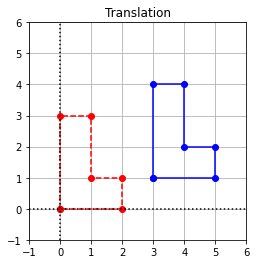

In [62]:
# Form a matrix of coordinates with rows x, y, 1
Ones = np.ones((1,7))
coords = np.vstack((x,y,Ones))

# Define the matrix for the transfomation L
A = np.array([[1,0,3],[0,1,1],[0,0,1]]) #This moves right

## Compute translation by matrix multiplication
coords_translated = A@coords

## Slice off the first and second rows.  These are the coords of the translated points
x_translated = coords_translated[0,:]
y_translated = coords_translated[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_translated,y_translated,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_translated,y_translated,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-1,6,-1,6])
ax.set_aspect('equal')
ax.set_title("Translation"); #three units to the right, and one unit up by a transformation

If we look closely at the computation, we realize that this way of computing the coordinates of the translated shape actually requires *more operations* than the first attempt where we stepped through the array and manipulated the coordinates directly.  <font color='red'>The important point to remember however is that the ability to represent the translation as a matrix multiplication means that we can merge it with another operation, such as rotation, in order to carry out both operations by multiplying by a single matrix.</font>

Translations of shapes in three dimensions can be done in a similar way by associating each set of coordinate $(x_1, x_2, x_3)$ in $\mathbb{R}^3$ with the point $(x_1, x_2, x_3, 1)$ in $\mathbb{R}^4$.

#### Exercises

**Exercise 1:** 

$(a)$ Find a single matrix that represents a transformation that has the effect of a reflection about the line $x_1=x_2$ followed by a shift four units to the left. Display the final matrix.

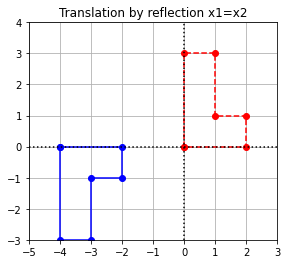

In [21]:
## Code solution here.
# Form a matrix of coordinates with rows x, y, 1
coords = np.array([[0,0],[0,3],[1,3],[1,1],[2,1],[2,0],[0,0]])
coords = coords.transpose()

x = coords[0,:]
y = coords[1,:]
Ones = np.ones((1,7))
coords = np.vstack((x,y,Ones))

# Define the matrix for the transformation effect of a Reflection
R_ref = np.array([[0,1,0],[1,0,0],[0,0,1]]) # reflection with homogeneous coordinates

transform_hom = np.array([[1,0,-4],[0,-1,0],
                          [0,0,1]]) # transformation with the homogeneous coordinates
#transform_ref = transform_hom.dot(R_ref)
## Compute translation by matrix multiplication
coords_translated1 = transform_hom@coords
## Slice off the first and second rows.  These are the coords of the translated points
x_translated1 = coords_translated1[0,:]
y_translated1 = coords_translated1[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_translated1,y_translated1,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_translated1,y_translated1,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-5,3,-3,4])
ax.set_aspect('equal')
ax.set_title("Translation by reflection x1=x2");

In [24]:
print("Matrix that causes transformation:")
Matrix(transform_hom)

Matrix that causes transformation:


Matrix([
[1,  0, -4],
[0, -1,  0],
[0,  0,  1]])

In [26]:
print("Final Matrix form for reflection:")
Matrix(coords_translated1)

Final Matrix form for reflection:


Matrix([
[-4.0, -4.0, -3.0, -3.0, -2.0, -2.0, -4.0],
[ 0.0, -3.0, -3.0, -1.0, -1.0,  0.0,  0.0],
[ 1.0,  1.0,  1.0,  1.0,  1.0,  1.0,  1.0]])

$(b)$ Create a new set of points to replace $\texttt{coords}$, named $\texttt{NewShape}$ Apply the transformation to the shape defined by $\texttt{NewShape}$ and plot the results.

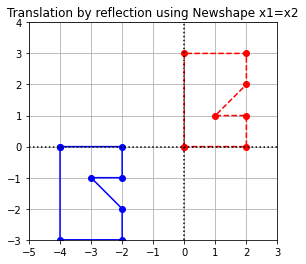

In [27]:
## Code solution here.
NewShape= np.array([[0,0],[0,3],[2,3],[2,2],[1,1],[2,1],[2,0],[0,0]])
NewShape = NewShape.transpose()
x = NewShape[0,:]
y = NewShape[1,:]

# Form a matrix of coordinates with rows x, y, 1
Ones = np.ones((1,8))
NewShape = np.vstack((x,y,Ones))

# Define the matrix for the transfomation effect of a Reflection
R_ref = np.array([[0,1,0],[1,0,0],[0,0,1]]) # reflection with homogeneous coordinates [[0,1],[1,0]] reflection about x1=x2

transform_ref = np.array([[1,0,-4],[0,-1,0],[0,0,1]]) #homogeneous coordinates with reflection about the x1=x2
## Compute translation by matrix multiplication
NewShape_translated1 = transform_ref@NewShape

## Slice off the first and second rows.  These are the coords of the translated points
x_translated1 = NewShape_translated1[0,:]
y_translated1 = NewShape_translated1[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_translated1,y_translated1,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_translated1,y_translated1,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-5,3,-3,4])
ax.set_aspect('equal')
ax.set_title("Translation by reflection using Newshape x1=x2");

In [28]:
print("Matrix for New shape:")
Matrix(NewShape)

Matrix for New shape:


Matrix([
[0.0, 0.0, 2.0, 2.0, 1.0, 2.0, 2.0, 0.0],
[0.0, 3.0, 3.0, 2.0, 1.0, 1.0, 0.0, 0.0],
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])

In [30]:
print("Final Matrix for reflection of the New shape:")
Matrix(NewShape_translated1)

Final Matrix for reflection of the New shape:


Matrix([
[-4.0, -4.0, -2.0, -2.0, -3.0, -2.0, -2.0, -4.0],
[ 0.0, -3.0, -3.0, -2.0, -1.0, -1.0,  0.0,  0.0],
[ 1.0,  1.0,  1.0,  1.0,  1.0,  1.0,  1.0,  1.0]])

**Exercise 2:** 

$(a)$ Find a single matrix that represents a rotation about the point $(1,2)$. You decide on the angle, but say what angle you are using.  (*Hint:  Make use of a translation to bring the center of rotation to $(0,0)$*.) Display the matrix.

In [33]:
## Code solution here.
import math
angle = math.radians(45)
p1 = np.array([[1, 0, 1], # x about the 1
               [0, 1, 2], [0, 0, 1]]) #y about 2
p2 = np.array([[1, 0, -1],
               [0, 1, -2], [0, 0, 1]]) #Translation to bring the center of rotation back to (0,0)
R_Matrix = np.array([[math.cos(angle), -math.sin(angle), 0],
                     [math.sin(angle), math.cos(angle), 0], [0, 0, 1]])
M_rotation = np.dot(p1, np.dot(R_Matrix, p2))
print("Final Matrix for rotating Newshape anticlockwise 45 degrees:")
Matrix(M_rotation)

Final Matrix for rotating Newshape anticlockwise 45 degrees:


Matrix([
[0.707106781186548, -0.707106781186547,   1.70710678118655],
[0.707106781186547,  0.707106781186548, -0.121320343559643],
[              0.0,                0.0,                1.0]])

$(b)$ Apply the transformation to the shape defined by $\texttt{NewShape}$ and plot the results.

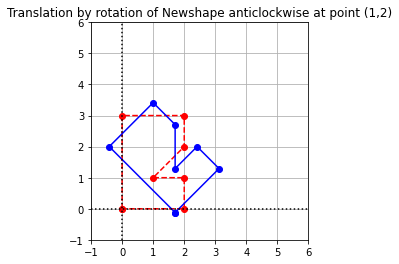

In [38]:
NewShape_translated1 = M_rotation@NewShape

## Slice off the first and second rows.  These are the coords of the translated points
x_translated1 = NewShape_translated1[0,:]
y_translated1 = NewShape_translated1[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_translated1,y_translated1,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_translated1,y_translated1,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-1,6,-1,6])
ax.set_aspect('equal')
ax.set_title("Translation by rotation of Newshape anticlockwise at point (1,2)");

In [37]:
print("Final Matrix for the rotation of New shape:")
np.round(NewShape_translated1,2)

Final Matrix for the rotation of New shape:


array([[ 1.71, -0.41,  1.  ,  1.71,  1.71,  2.41,  3.12,  1.71],
       [-0.12,  2.  ,  3.41,  2.71,  1.29,  2.  ,  1.29, -0.12],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ]])

**Exercise 3:** 

$(a)$ Find a matrix that represents clockwise rotation of $45^\circ$ about the point $(1,1)$ followed by a shift $3$ units to the right. Be sure to display the matrix you used.


In [41]:
## Code solution here.
clock_3= np.array([[1,0,3], # 3 units to the right
                   [0,1,0],[0,0,1]])
angle = math.radians(-45)
p1 = np.array([[1, 0, 1],
               [0, 1, 1], [0, 0, 1]])
p2 = np.array([[1, 0, -1],
               [0, 1, -1], [0, 0, 1]])
R_Matrix = np.array([[math.cos(angle), -math.sin(angle), 0],
                     [math.sin(angle), math.cos(angle), 0], [0, 0, 1]])
M_rotation = np.dot(p1, np.dot(R_Matrix, p2))
Matrix(M_rotation)
clock_33= clock_3@M_rotation
print("Final Matrix for transformation rotating shape clockwise 45 degrees moved 4 units to right:")
Matrix(clock_33)

Matrix([
[ 0.707106781186548, 0.707106781186547, -0.414213562373095],
[-0.707106781186547, 0.707106781186548,                1.0],
[               0.0,               0.0,                1.0]])

Final Matrix for transformation rotating shape clockwise 45 degrees moved 4 units to right:


Matrix([
[ 0.707106781186548, 0.707106781186547, 2.58578643762691],
[-0.707106781186547, 0.707106781186548,              1.0],
[               0.0,               0.0,              1.0]])

$(b)$  Apply the transformation to the shape defined by $\texttt{NewShape}$ and plot the results.

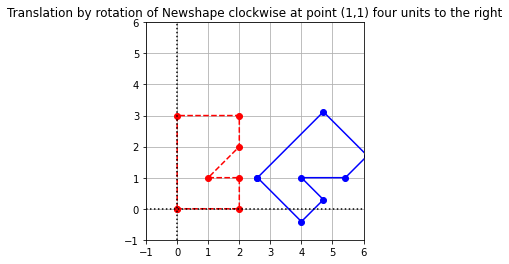

In [42]:
## Code solution here.
NewShape_translated1 = clock_33@NewShape

## Slice off the first and second rows.  These are the coords of the translated points
x_translated1 = NewShape_translated1[0,:]
y_translated1 = NewShape_translated1[1,:]

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the points.
ax.plot(x,y,'ro')
ax.plot(x_translated1,y_translated1,'bo')

# Connect the points by lines
ax.plot(x,y,'r',ls="--")
ax.plot(x_translated1,y_translated1,'b')

# Edit some settings 
ax.axvline(x=0,color="k",ls=":")
ax.axhline(y=0,color="k",ls=":")
ax.grid(True)
ax.axis([-1,6,-1,6])
ax.set_aspect('equal')
ax.set_title("Translation by rotation of Newshape clockwise at point (1,1) four units to the right");

In [43]:
print("Final Matrix for the rotation of New shape clockwise at point (1,1) four units to the right:")
np.round(NewShape_translated1,2)

Final Matrix for the rotation of New shape clockwise at point (1,1) four units to the right:


array([[ 2.59,  4.71,  6.12,  5.41,  4.  ,  4.71,  4.  ,  2.59],
       [ 1.  ,  3.12,  1.71,  1.  ,  1.  ,  0.29, -0.41,  1.  ],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ]])

**Exercise 4:** 

$(a)$ Now try an example in 3D. Create a shape in 3D. Find a single matrix that represents a transformation that has the effect of a shift $1$ units in the positive $x_1$ direction, $2$ units in the positive $x_2$ direction, and $3$ units in the positive $x_3$ direction. Be sure to display the matrix you used. 

In [44]:
## Code solution here.
import mpl_toolkits.mplot3d.axes3d as axes3d
D3_shape= np.array([[1,0,0,1],
                    [0,1,0,2],
                    [0,0,1,3],[0,0,0,1]])
print("Transformation effect in 3D with homogenous matrix:")
Matrix(D3_shape)

Transformation effect in 3D with homogenous matrix:


Matrix([
[1, 0, 0, 1],
[0, 1, 0, 2],
[0, 0, 1, 3],
[0, 0, 0, 1]])

$(b)$ Create a new set of coordinates in 3D, named $\texttt{FunShape}$, apply this transformation, and plot the results.

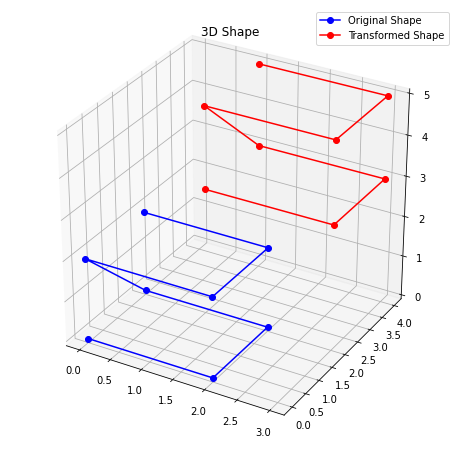

In [48]:
## Code solution here.
Fun_shape= np.array([[0, 2, 2, 0, 0, 2, 2, 0], 
                     [0, 0, 2, 2, 0, 0, 2, 2], 
                     [0, 0, 0, 0, 2, 2, 2, 2]]) 
x = Fun_shape[0,:]
y = Fun_shape[1,:]
z= Fun_shape[2,:]
Ones = np.ones((1,8))
Fun_shape = np.vstack((x,y,z,Ones))

T_funshape = D3_shape@Fun_shape
# Extract original and transformed coordinates
x_3D, y_3D, z_3D = Fun_shape[0,:], Fun_shape[1,:], Fun_shape[2,:]
xT_funshape_3D, yT_funshape_3D, zT_funshape_3D = T_funshape[0,:], T_funshape[1,:], T_funshape[2,:]

# Plot original and transformed shapes in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot original shape
ax.plot(x_3D, y_3D, z_3D, 'bo-', label="Original Shape") #, label="Original Shape"

# Plot transformed shape
ax.plot(xT_funshape_3D, yT_funshape_3D, zT_funshape_3D, 'ro-', label="Transformed Shape")

# Formatting the plot
#ax.set_xlabel("X-axis")ax.set_ylabel("Y-axis")ax.set_zlabel("Z-axis")
ax.set_title("3D Shape")
ax.legend()
ax.grid(True)

# Show plot
plt.show();

In [49]:
print("Final Matrix for transforming cubic shape in 3D with x1=1, x2=2, x3=3:")
T_funshape

Final Matrix for transforming cubic shape in 3D with x1=1, x2=2, x3=3:


array([[1., 3., 3., 1., 1., 3., 3., 1.],
       [2., 2., 4., 4., 2., 2., 4., 4.],
       [3., 3., 3., 3., 5., 5., 5., 5.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [50]:
("Final Matrix for initial matrix with no transformation:")
Fun_shape

'Final Matrix for initial matrix with no transformation:'

array([[0., 2., 2., 0., 0., 2., 2., 0.],
       [0., 0., 2., 2., 0., 0., 2., 2.],
       [0., 0., 0., 0., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])